OLS

In [ ]:
#ols
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# pizza = pd.read_csv("pizza.csv")

# X = pizza[['Promote']]
# y = pizza['Sales']
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
print(results.params)
print(results.summary())

Simple Linear Regression

In [ ]:
#Simple linear regression
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
# boston = pd.read_csv("Boston.csv")

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features and the target
# X = boston.drop('medv', axis=1)
# y = boston['medv']
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Print the Mean Squared Error of the model on the testing set
print(mean_squared_error(y_test, y_pred))

Regression line plot

In [ ]:
#regression line plot
import matplotlib.pyplot as plt
import numpy as np

# Choose the first feature as an example
feature = X.columns[0]

# Scatter plot of training data
plt.scatter(X_train[feature], y_train, color='blue', label='Train data')

# Scatter plot of testing data
plt.scatter(X_test[feature], y_test, color='red', label='Test data')

# Create a range of values for the chosen feature
x = np.linspace(min(X[feature]), max(X[feature])).reshape(-1, 1)

# Predict y values for the range of x values
y = lr.predict(pd.DataFrame(x, columns=[feature]))

# Plot the regression line
plt.plot(x, y, color='green', linewidth=3)

plt.xlabel(feature)
plt.ylabel('medv')
plt.title('Regression Line')
plt.legend()
plt.show()

L1 and L2 are different types of regularization techniques that can help to prevent overfitting in a machine learning model by adding a penalty term to the loss function.

- L1 regularization, also known as Lasso regularization, adds a penalty equal to the absolute value of the magnitude of coefficients. This can result in sparse outputs where some of the coefficients can become zero, effectively excluding the corresponding feature from the model.

- L2 regularization, also known as Ridge regularization, adds a penalty equal to the square of the magnitude of coefficients. This tends to spread coefficient values out more evenly.

In terms of specific models:

- The `Lasso` regression model uses L1 regularization.
- The `Ridge` regression model uses L2 regularization.
- The `ElasticNet` regression model uses a combination of both L1 and L2 regularization. The balance between them can be controlled with the `l1_ratio` parameter.

Ridge Regression

In [ ]:
#Ridge regression
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model
ridge = Ridge(alpha=1.0)

# Train the model
ridge.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_ridge = ridge.predict(X_test)

# Print the Mean Squared Error of the model on the testing set
print(mean_squared_error(y_test, y_pred_ridge))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Load the Boston dataset
# boston = load_boston()
# X, y = boston.data, boston.target
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the grid of hyperparameters to search
param_grid = {'ridge__alpha': np.logspace(-4, 0, 50)}

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold,scoring='neg_mean_squared_error', verbose=3)

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
model = grid.best_estimator_

In [ ]:
#Lasso regression
# Import necessary libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regression model
lasso = Lasso(alpha=1.0)

# Train the model
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lasso = lasso.predict(X_test)

# Print the Mean Squared Error of the model on the testing set
print(mean_squared_error(y_test, y_pred_lasso))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('lasso', Lasso())  # Apply Lasso regression
])

# Define the grid of hyperparameters to search
param_grid = {'lasso__alpha': np.logspace(-4, 0, 50)}

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=3)

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
model = grid.best_estimator_

In [ ]:
#Elasticnet
# Import necessary libraries
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the ElasticNet Regression model
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model
elasticnet.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_elasticnet = elasticnet.predict(X_test)

# Print the Mean Squared Error of the model on the testing set
print(mean_squared_error(y_test, y_pred_elasticnet))

In [ ]:
#grid search for elasticnet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('elasticnet', ElasticNet())  # Apply ElasticNet regression
])

# Define the grid of hyperparameters to search
param_grid = {'elasticnet__alpha': np.logspace(-4, 0, 50),
              'elasticnet__l1_ratio': np.linspace(0, 1, 50)}

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=3)

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
model = grid.best_estimator_
joblib.dump(model, 'elasticnet.pkl')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import joblib

# boston = pd.read_csv("Boston.csv")
# X = boston.drop('medv', axis=1)
# y = boston['medv']

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures()),  # Generate polynomial features
    ('scaler', StandardScaler()),  # Standardize data
    ('lr', LinearRegression())  # Apply Linear Regression
])

# Define the grid of hyperparameters to search
param_grid = {'poly__degree': [1, 2, 3]}

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=3)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Predict on the test set
y_pred = grid.predict(X_test)

# Print the mean squared error
print(mean_squared_error(y_test, y_pred))

# Save the model
joblib.dump(grid.best_estimator_, 'linear_regression.pkl')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import joblib

# boston = pd.read_csv("Boston.csv")
# X = boston.drop('medv', axis=1)
# y = boston['medv']

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('regressor', 'passthrough')  # Placeholder for the regressor
])

# Define the grid of hyperparameters to search
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'regressor': [LinearRegression()],
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'regressor': [Ridge()],
        'regressor__alpha': np.logspace(-4, 0, 50)
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'regressor': [Lasso()],
        'regressor__alpha': np.logspace(-4, 0, 50)
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'regressor': [ElasticNet()],
        'regressor__alpha': np.logspace(-4, 0, 50),
        'regressor__l1_ratio': [0.1, 0.5, 0.9]
    }
]

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=3)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Predict on the test set
y_pred = grid.predict(X_test)

# Print the mean squared error
print(mean_squared_error(y_test, y_pred))

# Save the model
joblib.dump(grid.best_estimator_, 'best_model.pkl')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import joblib

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=23)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('classifier', 'passthrough')  # Placeholder for the classifier
])

# Define the grid of hyperparameters to search
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
        'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
    }
]

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')

# Fit the model to the data
grid.fit(X, y)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Perform grid search with cross-validation for log loss
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_log_loss')

# Fit the model to the data
grid.fit(X, y)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Save the model
joblib.dump(grid.best_estimator_, 'best_model.pkl')

In [14]:
import joblib
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

# Generate synthetic data

# Generate synthetic data
X, y = make_blobs(n_samples=1000, n_features=20, centers=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('classifier', 'passthrough')  # Placeholder for the classifier
])

# Define the grid of hyperparameters to search
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
        'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
        'classifier__multi_class': ['ovr', 'multinomial']
    }
]

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
model = grid.best_estimator_

# Save the model
joblib.dump(grid.best_estimator_, 'best_model.pkl')

Best parameters:  {'classifier': LogisticRegression(), 'classifier__multi_class': 'ovr', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'scaler': StandardScaler()}
Best score:  1.0


['best_model.pkl']

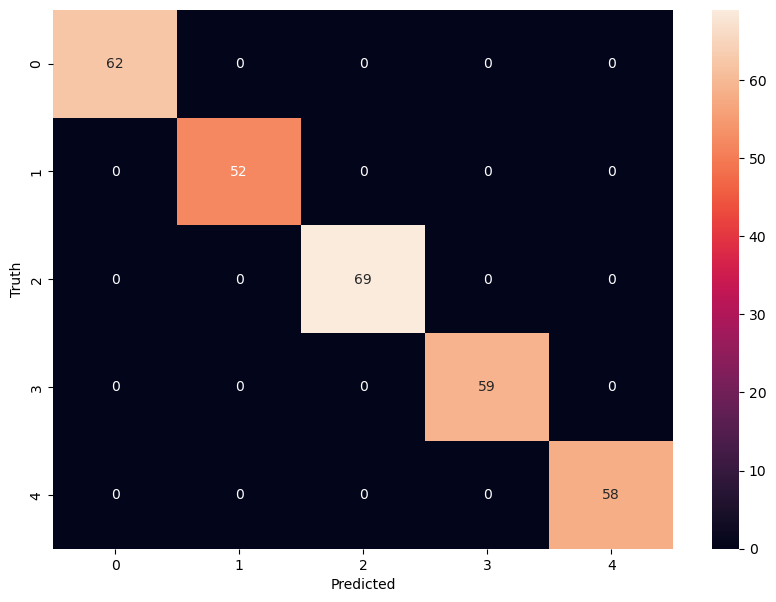

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the test set results
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import joblib

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=23)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('classifier', 'passthrough')  # Placeholder for the classifier
])

# Define the grid of hyperparameters to search
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': np.arange(1, 11)
    }
]

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')

# Fit the model to the data
grid.fit(X, y)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Perform grid search with cross-validation for log loss
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_log_loss')

# Fit the model to the data
grid.fit(X, y)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Save the model
joblib.dump(grid.best_estimator_, 'best_model.pkl')

Best parameters:  {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 5, 'scaler': MinMaxScaler()}
Best score:  0.9120000000000001
Best parameters:  {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 10, 'scaler': StandardScaler()}
Best score:  -0.6328959450495344


['best_model.pkl']

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import joblib

# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

kfold = KFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('regressor', 'passthrough')  # Placeholder for the regressor
])

# Define the grid of hyperparameters to search
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'regressor': [KNeighborsRegressor()],
        'regressor__n_neighbors': np.arange(1, 11)
    }
]

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Save the model
joblib.dump(grid.best_estimator_, 'best_model.pkl')

# Predict the labels of the test set
y_pred = grid.predict(X_test)

# Compute the mean squared error of the prediction
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Test set MSE: ", mse)

# Compute the R2 score of the prediction
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("Test set R2 score: ", r2)

Best parameters:  {'regressor': KNeighborsRegressor(), 'regressor__n_neighbors': 10, 'scaler': StandardScaler()}
Best score:  -0.3610560328739435
Test set MSE:  0.3345799529530316
Test set R2 score:  0.7515220005445229


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

kfold = KFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('classifier', 'passthrough')  # Placeholder for the classifier
])

# Define the grid of hyperparameters to search
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier': [BernoulliNB()],
        'classifier__alpha': np.linspace(0.1, 1, 10)
    }
]

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_log_loss')

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Save the model
joblib.dump(grid.best_estimator_, 'best_model.pkl')

# Predict the labels of the test set
y_pred = grid.predict(X_test)

# Compute the accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Test set accuracy: ", accuracy)

Best parameters:  {'classifier': BernoulliNB(), 'classifier__alpha': 1.0, 'scaler': StandardScaler()}
Best score:  -0.6076311669901493
Test set accuracy:  0.8962962962962963


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import joblib

# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

kfold = KFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('classifier', 'passthrough')  # Placeholder for the classifier
])

# Define the grid of hyperparameters to search
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier': [LinearDiscriminantAnalysis()],
        'classifier__solver': ['svd', 'lsqr', 'eigen']
    }
]

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Save the model
joblib.dump(grid.best_estimator_, 'best_model.pkl')

# Predict the labels of the test set
y_pred = grid.predict(X_test)

# Compute the accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Test set accuracy: ", accuracy)

Best parameters:  {'classifier': LinearDiscriminantAnalysis(), 'classifier__solver': 'svd', 'scaler': StandardScaler()}
Best score:  0.9548101265822785
Test set accuracy:  0.9415204678362573


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

kfold = KFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('classifier', 'passthrough')  # Placeholder for the classifier
])

# Define the grid of hyperparameters to search
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier': [SVC(kernel='linear')],
        'classifier__C': np.logspace(-3, 3, 7)
    }
]

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_log_loss')

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Save the model
joblib.dump(grid.best_estimator_, 'best_model.pkl')

# Predict the labels of the test set
y_pred = grid.predict(X_test)

# Compute the accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Test set accuracy: ", accuracy)

Best parameters:  {'classifier': SVC(kernel='linear'), 'classifier__C': 0.001, 'scaler': StandardScaler()}
Best score:  nan
Test set accuracy:  0.935672514619883


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Load the boston dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('regressor', 'passthrough')  # Placeholder for the regressor
])

# Define the grid of hyperparameters to search
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'regressor': [SVR(kernel='linear')],
        'regressor__C': np.logspace(-3, 3, 7)
    }
]

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Save the model
joblib.dump(grid.best_estimator_, 'best_model.pkl')

# Predict the labels of the test set
y_pred = grid.predict(X_test)

# Compute the mean squared error of the prediction
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Test set MSE: ", mse)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

kfold = KFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('classifier', 'passthrough')  # Placeholder for the classifier
])

# Define the grid of hyperparameters to search
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier': [SVC(kernel='rbf')],
        'classifier__C': np.logspace(-3, 3, 7),
        'classifier__gamma': np.logspace(-3, 3, 7)
    }
]

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Save the model
joblib.dump(grid.best_estimator_, 'best_model.pkl')

# Predict the labels of the test set
y_pred = grid.predict(X_test)

# Compute the accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Test set accuracy: ", accuracy)

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

kfold = KFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('regressor', 'passthrough')  # Placeholder for the regressor
])

# Define the grid of hyperparameters to search
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'regressor': [SVR(kernel='rbf')],
    'regressor__C': np.logspace(-3, 3, 7),
    'regressor__gamma': np.logspace(-3, 3, 7)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(pipe, param_grid, n_iter=50, cv=kfold, scoring='neg_mean_squared_error', random_state=23, verbose=3)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

# Save the model
joblib.dump(random_search.best_estimator_, 'best_model.pkl')

# Predict the labels of the test set
y_pred = random_search.predict(X_test)

# Compute the mean squared error of the prediction
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Test set MSE: ", mse)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END regressor=SVR(), regressor__C=0.01, regressor__gamma=100.0, scaler=StandardScaler();, score=-1.399 total time=  12.0s
[CV 2/5] END regressor=SVR(), regressor__C=0.01, regressor__gamma=100.0, scaler=StandardScaler();, score=-1.429 total time=  11.8s
[CV 3/5] END regressor=SVR(), regressor__C=0.01, regressor__gamma=100.0, scaler=StandardScaler();, score=-1.370 total time=  11.8s
[CV 4/5] END regressor=SVR(), regressor__C=0.01, regressor__gamma=100.0, scaler=StandardScaler();, score=-1.391 total time=  11.8s
[CV 5/5] END regressor=SVR(), regressor__C=0.01, regressor__gamma=100.0, scaler=StandardScaler();, score=-1.406 total time=  12.0s
[CV 1/5] END regressor=SVR(), regressor__C=1.0, regressor__gamma=100.0, scaler=MinMaxScaler();, score=-0.341 total time=  10.6s
[CV 2/5] END regressor=SVR(), regressor__C=1.0, regressor__gamma=100.0, scaler=MinMaxScaler();, score=-0.382 total time=  10.9s
[CV 3/5] END regressor=SVR(

KeyboardInterrupt: 

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

kfold = KFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('classifier', 'passthrough')  # Placeholder for the classifier
])

# Define the grid of hyperparameters to search
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier': [DecisionTreeClassifier()],
    'classifier__max_depth': np.arange(1, 10),
    'classifier__min_samples_split': np.arange(2, 10),
    'classifier__min_samples_leaf': np.arange(1, 10)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(pipe, param_grid, n_iter=50, cv=kfold, scoring='neg_log_loss', random_state=23)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

# Save the model
joblib.dump(random_search.best_estimator_, 'best_model.pkl')

# Predict the labels of the test set
y_pred = random_search.predict(X_test)

# Compute the accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Test set accuracy: ", accuracy)

Best parameters:  {'scaler': StandardScaler(), 'classifier__min_samples_split': 6, 'classifier__min_samples_leaf': 8, 'classifier__max_depth': 2, 'classifier': DecisionTreeClassifier()}
Best score:  -0.2894310201445437
Test set accuracy:  0.9532163742690059


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Load the california housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

kfold = KFold(n_splits=5, shuffle=True, random_state=23)

# Define the pipeline
pipe = Pipeline([
    ('scaler', 'passthrough'),  # Placeholder for the scaler
    ('regressor', 'passthrough')  # Placeholder for the regressor
])

# Define the grid of hyperparameters to search
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'regressor': [DecisionTreeRegressor()],
    'regressor__max_depth': np.arange(1, 10),
    'regressor__min_samples_split': np.arange(2, 10),
    'regressor__min_samples_leaf': np.arange(1, 10)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(pipe, param_grid, n_iter=50, cv=kfold, scoring='neg_mean_squared_error', random_state=23)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

# Save the model
joblib.dump(random_search.best_estimator_, 'best_model.pkl')

# Predict the labels of the test set
y_pred = random_search.predict(X_test)

# Compute the mean squared error of the prediction
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Test set MSE: ", mse)

Best parameters:  {'scaler': MinMaxScaler(), 'regressor__min_samples_split': 6, 'regressor__min_samples_leaf': 7, 'regressor__max_depth': 9, 'regressor': DecisionTreeRegressor()}
Best score:  -0.3984257779274868
Test set MSE:  0.36860134343640394


In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Define the individual classifiers
svm = SVC(probability=True, random_state=23)
lr = LogisticRegression(random_state=23)
dtc = DecisionTreeClassifier(random_state=23)

# Combine the classifiers in the ensemble model
voting = VotingClassifier(estimators=[('SVM',svm), ('LR',lr), ('TREE',dtc)], voting='soft')

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

# Define the parameter grid for RandomizedSearchCV
param_grid = {'SVM__gamma':['scale','auto'],
          'SVM__C': np.linspace(0.001,10, 10),
          'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'LR__penalty':['l1','l2', 'elasticnet', None],
          'LR__C': np.logspace(-4, 4, 20),
          'LR__multi_class':['ovr','multinomial'],
          'TREE__max_depth': [2,4,6,8,10,None],
          'TREE__min_samples_split':[2,5,10,15,20],
          'TREE__min_samples_leaf':[1,5,10,15,20]}

# Perform RandomizedSearchCV with the VotingClassifier
rgcv = RandomizedSearchCV(voting, param_distributions=param_grid, verbose=3, cv=kfold, scoring='neg_log_loss', random_state=23, n_iter=50)
rgcv.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Test set accuracy: ", accuracy)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END LR__C=0.615848211066026, LR__multi_class=ovr, LR__penalty=elasticnet, SVM__C=4.445, SVM__gamma=auto, SVM__kernel=linear, TREE__max_depth=10, TREE__min_samples_leaf=20, TREE__min_samples_split=15;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.615848211066026, LR__multi_class=ovr, LR__penalty=elasticnet, SVM__C=4.445, SVM__gamma=auto, SVM__kernel=linear, TREE__max_depth=10, TREE__min_samples_leaf=20, TREE__min_samples_split=15;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.615848211066026, LR__multi_class=ovr, LR__penalty=elasticnet, SVM__C=4.445, SVM__gamma=auto, SVM__kernel=linear, TREE__max_depth=10, TREE__min_samples_leaf=20, TREE__min_samples_split=15;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.615848211066026, LR__multi_class=ovr, LR__penalty=elasticnet, SVM__C=4.445, SVM__gamma=auto, SVM__kernel=linear, TREE__max_depth=10, TREE__min_samples_leaf=20, TREE__min_samples_split=15;, score=nan t

[CV 3/5] END LR__C=3792.690190732246, LR__multi_class=multinomial, LR__penalty=l2, SVM__C=6.667000000000001, SVM__gamma=auto, SVM__kernel=poly, TREE__max_depth=8, TREE__min_samples_leaf=15, TREE__min_samples_split=5;, score=-0.195 total time=   0.0s
[CV 4/5] END LR__C=3792.690190732246, LR__multi_class=multinomial, LR__penalty=l2, SVM__C=6.667000000000001, SVM__gamma=auto, SVM__kernel=poly, TREE__max_depth=8, TREE__min_samples_leaf=15, TREE__min_samples_split=5;, score=-0.089 total time=   0.0s
[CV 5/5] END LR__C=3792.690190732246, LR__multi_class=multinomial, LR__penalty=l2, SVM__C=6.667000000000001, SVM__gamma=auto, SVM__kernel=poly, TREE__max_depth=8, TREE__min_samples_leaf=15, TREE__min_samples_split=5;, score=-0.393 total time=   0.0s
[CV 1/5] END LR__C=78.47599703514607, LR__multi_class=ovr, LR__penalty=None, SVM__C=6.667000000000001, SVM__gamma=scale, SVM__kernel=poly, TREE__max_depth=8, TREE__min_samples_leaf=20, TREE__min_samples_split=5;, score=-0.208 total time=   0.0s
[CV 2

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import joblib
import numpy as np

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Define the individual classifiers
svm = SVC(probability=True, random_state=23)
lr = LogisticRegression(random_state=23)
dtc = DecisionTreeClassifier(random_state=23)

# Combine the classifiers in the ensemble model
voting = VotingClassifier(estimators=[('SVM',svm), ('LR',lr), ('TREE',dtc)], voting='soft')

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

# Define the parameter grid for RandomizedSearchCV
param_grid = {'SVM__gamma':['scale','auto'],
          'SVM__C': np.linspace(0.001,10, 10),
          'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'LR__penalty':['l1','l2', 'elasticnet', None],
          'LR__C': np.logspace(-4, 4, 20),
          'LR__multi_class':['ovr','multinomial'],
          'TREE__max_depth': [2,4,6,8,10,None],
          'TREE__min_samples_split':[2,5,10,15,20],
          'TREE__min_samples_leaf':[1,5,10,15,20]}

# Perform RandomizedSearchCV with the VotingClassifier
rgcv = RandomizedSearchCV(voting, param_distributions=param_grid, verbose=3, cv=kfold, scoring='neg_log_loss', random_state=23, n_iter=50)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", rgcv.best_score_)
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Test set accuracy: ", accuracy)

# Save the model
joblib.dump(rgcv, 'model.pkl')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END LR__C=0.615848211066026, LR__multi_class=ovr, LR__penalty=elasticnet, SVM__C=4.445, SVM__gamma=auto, SVM__kernel=linear, TREE__max_depth=10, TREE__min_samples_leaf=20, TREE__min_samples_split=15;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.615848211066026, LR__multi_class=ovr, LR__penalty=elasticnet, SVM__C=4.445, SVM__gamma=auto, SVM__kernel=linear, TREE__max_depth=10, TREE__min_samples_leaf=20, TREE__min_samples_split=15;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.615848211066026, LR__multi_class=ovr, LR__penalty=elasticnet, SVM__C=4.445, SVM__gamma=auto, SVM__kernel=linear, TREE__max_depth=10, TREE__min_samples_leaf=20, TREE__min_samples_split=15;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.615848211066026, LR__multi_class=ovr, LR__penalty=elasticnet, SVM__C=4.445, SVM__gamma=auto, SVM__kernel=linear, TREE__max_depth=10, TREE__min_samples_leaf=20, TREE__min_samples_split=15;, score=nan t

[CV 1/5] END LR__C=10000.0, LR__multi_class=ovr, LR__penalty=l2, SVM__C=7.7780000000000005, SVM__gamma=scale, SVM__kernel=rbf, TREE__max_depth=2, TREE__min_samples_leaf=10, TREE__min_samples_split=10;, score=-0.198 total time=   0.0s
[CV 2/5] END LR__C=10000.0, LR__multi_class=ovr, LR__penalty=l2, SVM__C=7.7780000000000005, SVM__gamma=scale, SVM__kernel=rbf, TREE__max_depth=2, TREE__min_samples_leaf=10, TREE__min_samples_split=10;, score=-0.090 total time=   0.0s
[CV 3/5] END LR__C=10000.0, LR__multi_class=ovr, LR__penalty=l2, SVM__C=7.7780000000000005, SVM__gamma=scale, SVM__kernel=rbf, TREE__max_depth=2, TREE__min_samples_leaf=10, TREE__min_samples_split=10;, score=-0.202 total time=   0.0s
[CV 4/5] END LR__C=10000.0, LR__multi_class=ovr, LR__penalty=l2, SVM__C=7.7780000000000005, SVM__gamma=scale, SVM__kernel=rbf, TREE__max_depth=2, TREE__min_samples_leaf=10, TREE__min_samples_split=10;, score=-0.129 total time=   0.0s
[CV 5/5] END LR__C=10000.0, LR__multi_class=ovr, LR__penalty=l2,

['model.pkl']

In [2]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_wine
from sklearn.metrics import mean_squared_error
import joblib
import numpy as np

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Define the individual regressors
rfr = RandomForestRegressor(random_state=23)
lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=23)

# Combine the regressors in the ensemble model
voting = VotingRegressor(estimators=[('RFR', rfr), ('LR', lr), ('DTR', dtr)])

# Define the parameter grid for RandomizedSearchCV
param_grid = {'RFR__n_estimators': [50, 100, 200],
              'RFR__max_depth': [2,4,6,8,10,None],
              'DTR__max_depth': [2,4,6,8,10,None],
              'DTR__min_samples_split':[2,5,10,15,20],
              'DTR__min_samples_leaf':[1,5,10,15,20]}

# Perform RandomizedSearchCV with the VotingRegressor
rgcv = RandomizedSearchCV(voting, param_distributions=param_grid, verbose=3, cv=5, scoring='neg_mean_squared_error', random_state=23, n_iter=50)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", -rgcv.best_score_)  # Multiply by -1 because the score is the negative MSE
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the mean squared error of the prediction
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print("Test set MSE: ", mse)

# Save the model
joblib.dump(rgcv, 'model.pkl')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END DTR__max_depth=None, DTR__min_samples_leaf=15, DTR__min_samples_split=20, RFR__max_depth=8, RFR__n_estimators=50;, score=-0.073 total time=   0.1s


[CV 2/5] END DTR__max_depth=None, DTR__min_samples_leaf=15, DTR__min_samples_split=20, RFR__max_depth=8, RFR__n_estimators=50;, score=-0.048 total time=   0.1s
[CV 3/5] END DTR__max_depth=None, DTR__min_samples_leaf=15, DTR__min_samples_split=20, RFR__max_depth=8, RFR__n_estimators=50;, score=-0.068 total time=   0.1s
[CV 4/5] END DTR__max_depth=None, DTR__min_samples_leaf=15, DTR__min_samples_split=20, RFR__max_depth=8, RFR__n_estimators=50;, score=-0.063 total time=   0.1s
[CV 5/5] END DTR__max_depth=None, DTR__min_samples_leaf=15, DTR__min_samples_split=20, RFR__max_depth=8, RFR__n_estimators=50;, score=-0.032 total time=   0.1s
[CV 1/5] END DTR__max_depth=2, DTR__min_samples_leaf=1, DTR__min_samples_split=10, RFR__max_depth=8, RFR__n_estimators=100;, score=-0.061 total time=   0.2s
[CV 2/5] END DTR__max_depth=2, DTR__min_samples_leaf=1, DTR__min_samples_split=10, RFR__max_depth=8, RFR__n_estimators=100;, score=-0.038 total time=   0.2s
[CV 3/5] END DTR__max_depth=2, DTR__min_sample

['model.pkl']

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, f1_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Create a pipeline with a StandardScaler and a BaggingClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging', BaggingClassifier(random_state=23))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'bagging__n_estimators': [10, 50, 100, 200],
    'bagging__max_samples': [0.5, 1.0],
    'bagging__max_features': [0.5, 1.0],
    'bagging__bootstrap': [True, False],
    'bagging__bootstrap_features': [True, False]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_log_loss', random_state=23, n_iter=50, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", -rgcv.best_score_)  # Multiply by -1 because the score is the negative log loss
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the confusion matrix and F1 score
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the confusion matrix and F1 score
print("Confusion Matrix: \n", cm)
print("F1 Score: ", f1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END bagging__bootstrap=False, bagging__bootstrap_features=False, bagging__max_features=1.0, bagging__max_samples=1.0, bagging__n_estimators=10;, score=-1.850 total time=   0.0s
[CV 2/5] END bagging__bootstrap=False, bagging__bootstrap_features=False, bagging__max_features=1.0, bagging__max_samples=1.0, bagging__n_estimators=10;, score=-1.760 total time=   0.0s
[CV 3/5] END bagging__bootstrap=False, bagging__bootstrap_features=False, bagging__max_features=1.0, bagging__max_samples=1.0, bagging__n_estimators=10;, score=-3.433 total time=   0.0s
[CV 4/5] END bagging__bootstrap=False, bagging__bootstrap_features=False, bagging__max_features=1.0, bagging__max_samples=1.0, bagging__n_estimators=10;, score=-1.716 total time=   0.0s
[CV 5/5] END bagging__bootstrap=False, bagging__bootstrap_features=False, bagging__max_features=1.0, bagging__max_samples=1.0, bagging__n_estimators=10;, score=-1.831 total time=   0.0s
[CV 1/5]

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the california housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with a StandardScaler and a BaggingRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging', BaggingRegressor(random_state=23))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'bagging__n_estimators': [10, 50, 100, 200],
    'bagging__max_samples': [0.5, 1.0],
    'bagging__max_features': [0.5, 1.0],
    'bagging__bootstrap': [True, False],
    'bagging__bootstrap_features': [True, False]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', random_state=42, n_iter=50, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", -rgcv.best_score_)  # Multiply by -1 because the score is the negative MSE
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MSE and R2 score
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Create a pipeline with a StandardScaler and a RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=23))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 5, 10, 15, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_log_loss', random_state=23, n_iter=50, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", -rgcv.best_score_)  # Multiply by -1 because the score is the negative log loss
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the confusion matrix and F1 score
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the confusion matrix and F1 score
print("Confusion Matrix: \n", cm)
print("F1 Score: ", f1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=10;, score=-0.236 total time=   0.0s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=10;, score=-0.099 total time=   0.1s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=10;, score=-0.165 total time=   0.0s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=10;, score=-0.087 total time=   0.0s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=10;, score=-0.131 total time=   0.0s
[CV 1/5] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=50;, score=-0.343 total time=   0.1s
[CV 2/5] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=50;, score=-0.079 total time=   0.1s
[CV 3

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the california housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with a StandardScaler and a BaggingRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging', BaggingRegressor(random_state=23))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'bagging__n_estimators': [10, 50, 100, 200],
    'bagging__max_samples': [0.5, 1.0],
    'bagging__max_features': [0.5, 1.0],
    # 'bagging__bootstrap': [True, False],
    # 'bagging__bootstrap_features': [True, False]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', random_state=42, n_iter=50, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", -rgcv.best_score_)  # Multiply by -1 because the score is the negative MSE
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MSE and R2 score
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[CV 1/5] END bagging__max_features=0.5, bagging__max_samples=0.5, bagging__n_estimators=10;, score=-0.381 total time=   0.5s
[CV 2/5] END bagging__max_features=0.5, bagging__max_samples=0.5, bagging__n_estimators=10;, score=-0.377 total time=   0.5s
[CV 3/5] END bagging__max_features=0.5, bagging__max_samples=0.5, bagging__n_estimators=10;, score=-0.396 total time=   0.3s
[CV 4/5] END bagging__max_features=0.5, bagging__max_samples=0.5, bagging__n_estimators=10;, score=-0.381 total time=   0.3s
[CV 5/5] END bagging__max_features=0.5, bagging__max_samples=0.5, bagging__n_estimators=10;, score=-0.384 total time=   0.3s
[CV 1/5] END bagging__max_features=0.5, bagging__max_samples=0.5, bagging__n_estimators=50;, score=-0.335 total time=   1.6s
[CV 2/5] END bagging__max_features=0.5, bagging__max_samples=0.5, bagging__n_estimators=50;, score=-0.320 total time=   1.7s
[CV 3/5] END bagging__max_features=0.5, bagging__max_samples=0.5, bagging__n_estimators=50;, score=-0.330 total time=   1.7s


In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the boston dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Create a pipeline with a StandardScaler and a RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=23))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 5, 10, 15, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', random_state=23, n_iter=10, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", np.sqrt(-rgcv.best_score_))  # Multiply by -1 and take the square root because the score is the negative mean squared error
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error: ", mse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=10;, score=-0.442 total time=   0.4s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=10;, score=-0.454 total time=   0.3s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=10;, score=-0.445 total time=   0.3s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=10;, score=-0.440 total time=   0.3s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=10;, score=-0.475 total time=   0.3s
[CV 1/5] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=50;, score=-0.262 total time=   4.0s
[CV 2/5] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=50;, score=-0.278 total time=   4.1s
[CV 3/

KeyboardInterrupt: 

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with a StandardScaler and a GradientBoostingClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gbc', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'gbc__max_depth': [2, 3, 4, 5, 6, None],
    'gbc__learning_rate': np.linspace(0.001, 0.999, 10),
    'gbc__n_estimators': [50, 100, 150]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_log_loss', random_state=42, n_iter=50, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", rgcv.best_score_)
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the confusion matrix and F1 score
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the confusion matrix and F1 score
print("Confusion Matrix: \n", cm)
print("F1 Score: ", f1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END gbc__learning_rate=0.11188888888888888, gbc__max_depth=2, gbc__n_estimators=100;, score=-0.173 total time=   0.3s
[CV 2/5] END gbc__learning_rate=0.11188888888888888, gbc__max_depth=2, gbc__n_estimators=100;, score=-0.719 total time=   0.3s
[CV 3/5] END gbc__learning_rate=0.11188888888888888, gbc__max_depth=2, gbc__n_estimators=100;, score=-0.586 total time=   0.3s
[CV 4/5] END gbc__learning_rate=0.11188888888888888, gbc__max_depth=2, gbc__n_estimators=100;, score=-0.177 total time=   0.3s
[CV 5/5] END gbc__learning_rate=0.11188888888888888, gbc__max_depth=2, gbc__n_estimators=100;, score=-0.488 total time=   0.3s
[CV 1/5] END gbc__learning_rate=0.22277777777777777, gbc__max_depth=4, gbc__n_estimators=50;, score=-0.463 total time=   0.2s
[CV 2/5] END gbc__learning_rate=0.22277777777777777, gbc__max_depth=4, gbc__n_estimators=50;, score=-2.852 total time=   0.2s
[CV 3/5] END gbc__learning_rate=0.22277777777777777

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with a StandardScaler and a GradientBoostingRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'gbr__max_depth': [2, 3, 4, 5, 6, None],
    'gbr__learning_rate': np.linspace(0.001, 0.999, 10),
    'gbr__n_estimators': [50, 100, 150]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', random_state=42, n_iter=50, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", np.sqrt(-rgcv.best_score_))  # Multiply by -1 and take the square root because the score is the negative mean squared error
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error: ", mse)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END gbr__learning_rate=0.11188888888888888, gbr__max_depth=2, gbr__n_estimators=100;, score=-0.331 total time=   2.3s
[CV 2/5] END gbr__learning_rate=0.11188888888888888, gbr__max_depth=2, gbr__n_estimators=100;, score=-0.307 total time=   2.0s
[CV 3/5] END gbr__learning_rate=0.11188888888888888, gbr__max_depth=2, gbr__n_estimators=100;, score=-0.314 total time=   2.0s
[CV 4/5] END gbr__learning_rate=0.11188888888888888, gbr__max_depth=2, gbr__n_estimators=100;, score=-0.317 total time=   2.1s
[CV 5/5] END gbr__learning_rate=0.11188888888888888, gbr__max_depth=2, gbr__n_estimators=100;, score=-0.333 total time=   2.0s
[CV 1/5] END gbr__learning_rate=0.22277777777777777, gbr__max_depth=4, gbr__n_estimators=50;, score=-0.268 total time=   2.0s
[CV 2/5] END gbr__learning_rate=0.22277777777777777, gbr__max_depth=4, gbr__n_estimators=50;, score=-0.257 total time=   1.9s
[CV 3/5] END gbr__learning_rate=0.22277777777777777

KeyboardInterrupt: 

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with a StandardScaler and a XGBClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'xgb__max_depth': [2, 3, 4, 5, 6, None],
    'xgb__learning_rate': np.linspace(0.001, 0.1, 10),
    'xgb__n_estimators': [50, 100, 150]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_log_loss', random_state=42, n_iter=50, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", -rgcv.best_score_)  # Multiply by -1 because the score is the negative log loss
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the confusion matrix and F1 score
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the confusion matrix and F1 score
print("Confusion Matrix: \n", cm)
print("F1 Score: ", f1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END xgb__learning_rate=0.012, xgb__max_depth=2, xgb__n_estimators=100;, score=-0.364 total time=   0.1s
[CV 2/5] END xgb__learning_rate=0.012, xgb__max_depth=2, xgb__n_estimators=100;, score=-0.467 total time=   0.1s


[CV 3/5] END xgb__learning_rate=0.012, xgb__max_depth=2, xgb__n_estimators=100;, score=-0.574 total time=   0.1s
[CV 4/5] END xgb__learning_rate=0.012, xgb__max_depth=2, xgb__n_estimators=100;, score=-0.353 total time=   0.1s
[CV 5/5] END xgb__learning_rate=0.012, xgb__max_depth=2, xgb__n_estimators=100;, score=-0.450 total time=   0.1s
[CV 1/5] END xgb__learning_rate=0.023000000000000003, xgb__max_depth=4, xgb__n_estimators=50;, score=-0.345 total time=   0.0s
[CV 2/5] END xgb__learning_rate=0.023000000000000003, xgb__max_depth=4, xgb__n_estimators=50;, score=-0.475 total time=   0.0s
[CV 3/5] END xgb__learning_rate=0.023000000000000003, xgb__max_depth=4, xgb__n_estimators=50;, score=-0.559 total time=   0.0s
[CV 4/5] END xgb__learning_rate=0.023000000000000003, xgb__max_depth=4, xgb__n_estimators=50;, score=-0.346 total time=   0.0s
[CV 5/5] END xgb__learning_rate=0.023000000000000003, xgb__max_depth=4, xgb__n_estimators=50;, score=-0.448 total time=   0.0s
[CV 1/5] END xgb__learning

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with a StandardScaler and a XGBRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'xgb__max_depth': [3, 5, 7, None],
    'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgb__n_estimators': [50, 100, 150, 200],
    'xgb__subsample': [0.5, 0.7, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.2]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', random_state=42, n_iter=10, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", np.sqrt(-rgcv.best_score_))  # Multiply by -1 and take the square root because the score is the negative mean squared error
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error: ", mse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END xgb__colsample_bytree=0.8, xgb__gamma=0.2, xgb__learning_rate=0.3, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.7;, score=-0.246 total time=   0.3s
[CV 2/5] END xgb__colsample_bytree=0.8, xgb__gamma=0.2, xgb__learning_rate=0.3, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.7;, score=-0.243 total time=   0.6s
[CV 3/5] END xgb__colsample_bytree=0.8, xgb__gamma=0.2, xgb__learning_rate=0.3, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.7;, score=-0.237 total time=   0.2s
[CV 4/5] END xgb__colsample_bytree=0.8, xgb__gamma=0.2, xgb__learning_rate=0.3, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.7;, score=-0.240 total time=   0.2s
[CV 5/5] END xgb__colsample_bytree=0.8, xgb__gamma=0.2, xgb__learning_rate=0.3, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.7;, score=-0.239 total time=   0.2s
[CV 1/5] END xgb__colsample_bytree=1.0, xgb__gamma=0.1, xgb__learning

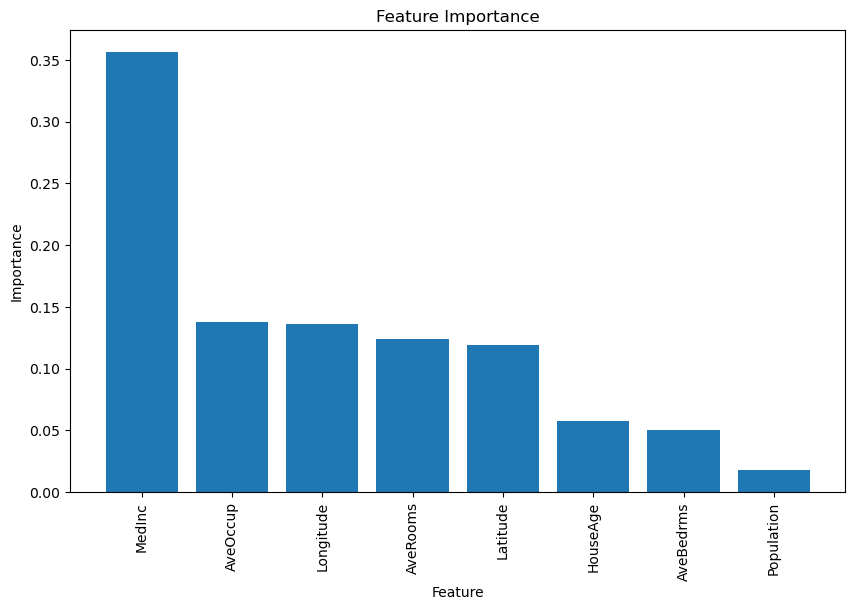

In [3]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, feature_names):
    # Get feature importances
    importances = model.feature_importances_

    # Sort the feature importances in descending order and get the indices
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [feature_names[i] for i in indices]

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Create a bar chart, in order of importance
    plt.bar(range(len(importances)), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(len(importances)), names, rotation=90)

    # Set chart title and labels
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Importance")

    # Show the plot
    plt.show()

# Call the function with the model and feature names
plot_feature_importance(rgcv.best_estimator_.named_steps['xgb'], california.feature_names)

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with a StandardScaler and a LGBMClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMClassifier(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'lgbm__max_depth': [2, 3, 4, 5, 6, None],
    'lgbm__learning_rate': np.linspace(0.001, 0.999, 10),
    'lgbm__n_estimators': [50, 100, 150]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_log_loss', random_state=42, n_iter=50, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", -rgcv.best_score_)  # Multiply by -1 because the score is the negative log loss
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the confusion matrix and F1 score
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the confusion matrix and F1 score
print("Confusion Matrix: \n", cm)
print("F1 Score: ", f1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 4
[LightGBM] [Info] Start training from score -1.211941
[LightGBM] [Info] Start training from score -1.063521
[LightGBM] [Info] Start training from score -1.029619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with a StandardScaler and a LGBMRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMRegressor(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'lgbm__max_depth': [3, 5, 7, None],
    'lgbm__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'lgbm__n_estimators': [50, 100, 150, 200],
    'lgbm__subsample': [0.5, 0.7, 1.0],
    'lgbm__colsample_bytree': [0.6, 0.8, 1.0],
    'lgbm__reg_alpha': [0, 0.1, 0.2],
    'lgbm__reg_lambda': [0, 0.1, 0.2]
}

# Perform RandomizedSearchCV with the pipeline
rgcv = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', random_state=42, n_iter=50, verbose=3)
rgcv.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score: ", np.sqrt(-rgcv.best_score_))  # Multiply by -1 and take the square root because the score is the negative mean squared error
print("Best parameters: ", rgcv.best_params_)

# Predict the labels of the test set
y_pred = rgcv.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error: ", mse)

# print r2_score
from sklearn.metrics import r2_score
print("R2 Score: ", r2_score(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 11558, number of used features: 8
[LightGBM] [Info] Start training from score 2.061439
[CV 1/5] END lgbm__colsample_bytree=0.6, lgbm__learning_rate=0.1, lgbm__max_depth=None, lgbm__n_estimators=200, lgbm__reg_alpha=0.2, lgbm__reg_lambda=0.1, lgbm__subsample=1.0;, score=-0.220 total time=   0.3s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 11558, number of used features: 8
[LightGBM] [Info] Start training from score 2.077690
[CV 2/5] END lgbm__colsample_bytree=0.6, lgbm__

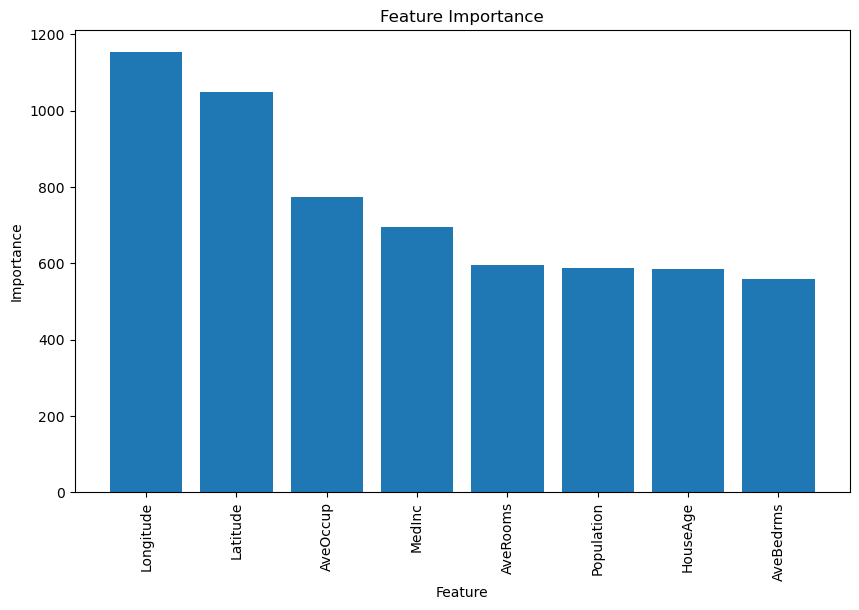

In [7]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, feature_names):
    # Get feature importances
    importances = model.feature_importances_

    # Sort the feature importances in descending order and get the indices
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [feature_names[i] for i in indices]

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Create a bar chart, in order of importance
    plt.bar(range(len(importances)), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(len(importances)), names, rotation=90)

    # Set chart title and labels
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Importance")

    # Show the plot
    plt.show()

# Call the function with the model and feature names
plot_feature_importance(rgcv.best_estimator_.named_steps['lgbm'], california.feature_names)